# Summary

The goal is to predict the customers that buy insurance policy.

# Load data set

**Caravan** data set: The data contains 5822 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy. 

Data was used in the CoIL Challenge 2000: The Insurance Company Case. Further information on the individual variables can be obtained at http://www.liacs.nl/~putten/library/cc2000/data.html

In [ ]:
# Install ISLR package from CRAN to access data set
install.packages("ISLR")
require(ISLR)
attach(Caravan)

In [ ]:
# Summary of all variables 
summary(Purchase)

No  Yes 
5474  348

# Descriptive analysis

Scatter plot and correlations of all variables using color coding of the Purchase variable.

In [ ]:
install.packages("psych",dependencies=TRUE)
library(psych)

In [ ]:
# Convert to numeric variable
Purchase.num = ifelse(Purchase=="Yes", 1, 0)
Caravan.num = Caravan
Caravan.num$Purchase = Purchase.num

Investigate the largest correlations

In [ ]:
ind_start = 1
num_range = 15
for (i in 1:5){
  ind_end = ind_start+num_range-1
  C_fr = data.frame(0.01*round(100*cor(Caravan.num[,c(ind_start:ind_end,86)])))
  if (i == 1){
    cor_purchase = C_fr[dim(C_fr)[1],]    
  } else {
    cor_purchase = c(cor_purchase, C_fr[dim(C_fr)[1],])
  }
  #print(C_fr[dim(C_fr)[1],])
  ind_start = ind_end+1
}
ind_end = dim(Caravan)[2]
C_fr = data.frame(0.01*round(100*cor(Caravan.num[,c(ind_start:ind_end,86)])))
cor_purchase = c(cor_purchase, C_fr[dim(C_fr)[1],])
#print(C_fr[dim(C_fr)[1],])

In [ ]:
cor_purchase_fr = data.frame(cor_purchase)
cor_purchase_fr

MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase.6,Purchase.1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.07,-0.01,0.04,0,-0.07,0.01,0.03,0,-0.04,0.07,⋯,0.03,0.02,0.06,0.03,0.11,0.03,0.02,0.07,1,1


Largest **positive correlations** with *Purchase*: 
* MOPLHOOG (High level education): 0.08, MBERHOOG (High status): 0.07, MSKA (Social class A): 0.06,
* MRELGE (Married): 0.07
* MHKOOP (Home owners): 0.08,
* MZPART (Private health insurance): 0.06,
* MINK4575 (Income 30-45.000): 0.06, MINK7512 (Income 75-122.000): 0.06,  (Average income): 0.09, MKOOPKLA (Purchasing power class): 0.1, 
* APERSAUT (Number of car policies): 0.14, ABRAND (Number of fire policies): 0.06, APLEZIER (Number of boat policies): 0.11, ABYSTAND (Number of social security insurance policies
): 0.07. 
* PWAPART (Contribution private third party insurance see L4): 0.1, PPERSAUT (Contribution car policies): 0.15, PBRAND (Contribution fire policies): 0.09, PPLEZIER (Contribution boat policies): 0.09, AWAPART (Number of private third party insurance): 0.09, APERSAUT (Number of car policies): 0.14,

Largest **negative correlations** with *Purchase*: 
* MOSTYPE (Customer Subtype): -0.07, MOSHOOFD (Customer main type): -0.07, 
* MRELOV (Other relation): -0.06, MFALLEEN (Singles): -0.05, 
* MOPLLAAG (Lower level education): -0.09,  MSKD (Social class D): -0.06, 
* MHHUUR (Rented house): -0.08, MAUT0 (No car): -0.08, 
* MINKM30 (Income < 30.000): -0.08,  
 ABROM (Number of moped policies): -0.05

Matrix scatter plot for specific variables: 16 MOPLHOOG (High level education): 0.08, 10 MRELGE (Married): 0.07, 31 MHKOOP (Home owners): 0.08, 36 MZPART (Private health insurance): 0.06, 42 MINKGEM (Average income): 0.09, 43 APERSAUT (Number of car policies): 0.14, 44 PWAPART (Contribution private third party insurance see L4): 0.1.

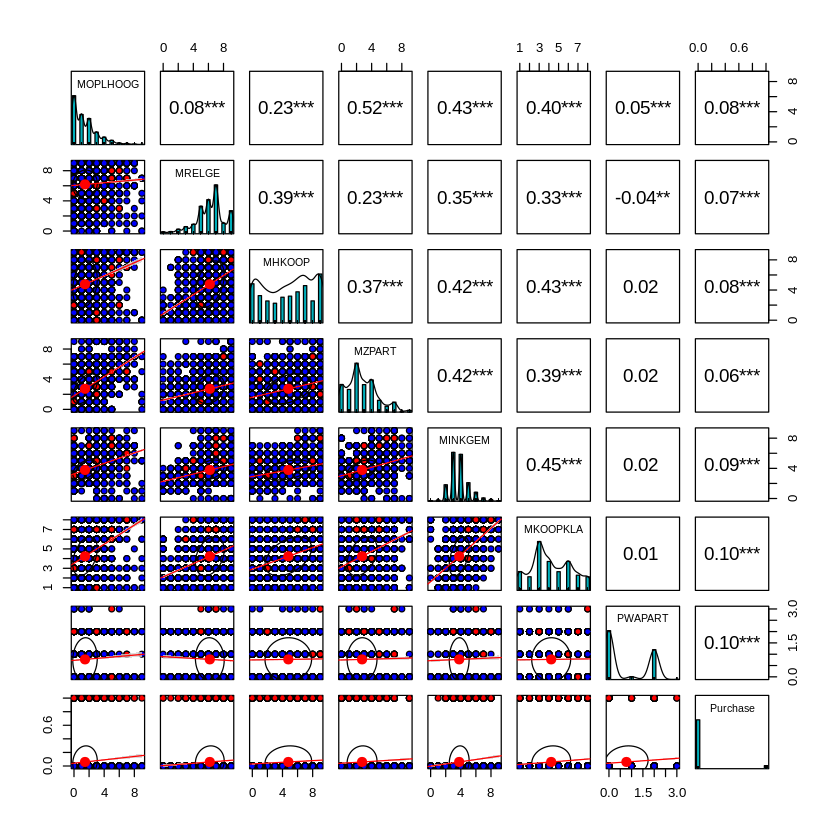

In [ ]:
selected_var = c(16,10,31,36,42,43,44,86)
# names(Caravan)[selected_var]
pairs.panels(Caravan.num[,selected_var], 
             pch = 21, # dot shape needed for color grouping
             bg =c("blue","red")[Caravan$Purchase],
             method = "pearson", # correlation method
             hist.col = "#00AFBB", # color
             lm=TRUE, # lin fit
             density = TRUE,  # show density plots
             ellipses = TRUE, # show correlation ellipses
             stars = TRUE, # show significant correlation with astricks
             ci = TRUE, # confidence intervals
)

# Data standardization and split

Standardized the data by whitening all predictors to zero mean and standard devitation equal to one.


In [ ]:
# Standardized numerical variables for K-NN
standardized.X = scale(Caravan[,-86])
# summary (standardized.X)

In [ ]:
# Split data
test = 1:1000
test.X = standardized.X[test,]
train.X = standardized.X[-test,]
test.Y = Caravan[test,86]
train.Y = Caravan[-test,86]

# Predict using logistic regression

In [ ]:
glm.fit = glm(Purchase~., data=Caravan, family = binomial, subset = -test)

Find large coefficients for 

In [ ]:
print('Largest coefficients: ') 
ind_largest = abs(glm.fit$coefficients) > 1
glm.fit$coefficients[ind_largest]

[1] "Largest coefficients: "


(Intercept)      MHHUUR      MHKOOP     MZFONDS      MZPART     PBESAUT 
 258.344789  -14.832587  -14.807484  -14.802764  -14.859141   12.350903 
    PVRAAUT      PWERKT     PGEZONG     AWALAND     ABESAUT     AVRAAUT 
  -1.814951   -5.744866    1.053695   -1.081438  -73.727528   -5.982636 
   AAANHANG    ATRACTOR       ABROM     AGEZONG     AWAOREG     AZEILPL 
  -1.136826   -2.004171   -1.385892   -1.978539   -2.773684  -14.988990 
   APLEZIER     AINBOED    ABYSTAND 
   3.090881    1.857675    1.910730

Predict and display confusion matrix and error rate: 

In [ ]:
glm.probs=predict(glm.fit,newdata=Caravan[test,],type="response") 
glm.pred=ifelse(glm.probs >0.25,"Yes","No")
print('Confusion matrix:')
glm.table = table(glm.pred, test.Y)
glm.table
print(paste0('Error rate: ', mean(glm.pred != test.Y)))


[1] "Confusion matrix:"


        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11

[1] "Error rate: 0.07"


In [ ]:
TP = glm.table[2,2]
TN = glm.table[1,1]
FP = glm.table[2,1]
FN = glm.table[1,2]
P = glm.table[1,2]+glm.table[2,2]
N = glm.table[1,1]+glm.table[2,1]

# Confusion matrix
print("Confusion matrix: ")
matrix(c('','Pred P', 'Pred N', 'Cond Pos=P', 'TP', 'FN', 'Cond N=N', 'FP', 'TN'), ncol=3)
print("--------")
# Betting to the largest class
print(paste0("Success of betting to largest class=('No'== test.Y)=",mean('No' == test.Y)))
print(paste0("Error rate of betting to largest class=('No'!= test.Y)=",mean('No' != test.Y)))
print("--------")
# Accuracy 
# Mean(knn.pred == test.Y) 
acc = (TP+TN)/(P+N)
print(paste0("Accuracy (success rate)=(pred==data)=(TP+TN)/(P+N)=",acc))
# Misclassification rate
print(paste0("Misclassification rate=(pred!=data)=(FP+FN)/(P+N)=",mean(knn.pred != test.Y)))
print("--------")
# Precision = pos pred val PPV = success rate
PPV = TP/(TP+FP)
print(paste0("Precision=PPV=TP/(TP+FP)=",PPV))
print("--------")
# TPR = % true pos = sensitivity = recall 
TPR = TP/P
print(paste0("TPR=sensitivity=recall=hit rate=TP/P=",TPR))
# TNR = % true neg = specificity
TNR = TN/N
print(paste0("TNR=specificity=selectivity=TN/N=",TNR))
print("--------")
# FPR = % neg as pos = 1-specificity
FPR = FP/N
print(paste0("FPR=(neg as pos)= FP/N=fall out=1-specificity=",FPR))
# FNR = % pos as neg
FNR = FN/P
print(paste0("FNR=(pos as neg)=FN/P=1-TPR=",FNR))


# Predict using K-NN

In [ ]:
library(class)

In [ ]:
# k=1, 3, 5
knn.pred = knn(train.X, test.X, train.Y, k=3)
print('Confusion matrix:')
knn.table = table(knn.pred, test.Y)
print(knn.table)
print('----------')
print(paste0("Accuracy =(pred==data)=",mean(knn.pred == test.Y)))
print(paste0("Misclassification rate=(pred!=data)=",mean(knn.pred != test.Y)))


[1] "Confusion matrix:"
        test.Y
knn.pred  No Yes
     No  921  54
     Yes  20   5
[1] "----------"
[1] "Accuracy =(pred==data)=0.926"
[1] "Misclassification rate=(pred!=data)=0.074"


In [ ]:
TP = knn.table[2,2]
TN = knn.table[1,1]
FP = knn.table[2,1]
FN = knn.table[1,2]
P = knn.table[1,2]+knn.table[2,2]
N = knn.table[1,1]+knn.table[2,1]

# Confusion matrix
print("Confusion matrix: ")
matrix(c('','Pred P', 'Pred N', 'Cond Pos=P', 'TP', 'FN', 'Cond N=N', 'FP', 'TN'), ncol=3)
print("--------")
# Betting to the largest class
print(paste0("Success of betting to largest class=('No'== test.Y)=",mean('No' == test.Y)))
print(paste0("Error rate of betting to largest class=('No'!= test.Y)=",mean('No' != test.Y)))
print("--------")
# Accuracy 
# Mean(knn.pred == test.Y) 
acc = (TP+TN)/(P+N)
print(paste0("Accuracy (success rate)=(pred==data)=(TP+TN)/(P+N)=",acc))
# Misclassification rate
print(paste0("Misclassification rate=(pred!=data)=(FP+FN)/(P+N)=",mean(knn.pred != test.Y)))
print("--------")
# Precision = pos pred val PPV = success rate
PPV = TP/(TP+FP)
print(paste0("Precision=PPV=TP/(TP+FP)=",PPV))
print("--------")
# TPR = % true pos = sensitivity = recall 
TPR = TP/P
print(paste0("TPR=sensitivity=recall=hit rate=TP/P=",TPR))
# TNR = % true neg = specificity
TNR = TN/N
print(paste0("TNR=specificity=selectivity=TN/N=",TNR))
print("--------")
# FPR = % neg as pos = 1-specificity
FPR = FP/N
print(paste0("FPR=(neg as pos)= FP/N=fall out=1-specificity=",FPR))
# FNR = % pos as neg
FNR = FN/P
print(paste0("FNR=(pos as neg)=FN/P=1-TPR=",FNR))


[1] "Confusion matrix: "


,Cond Pos=P,Cond N=N
Pred P,TP,FP
Pred N,FN,TN


[1] "--------"
[1] "Success of betting to largest class=('No'== test.Y)=0.941"
[1] "Error rate of betting to largest class=('No'!= test.Y)=0.059"
[1] "--------"
[1] "Accuracy (success rate)=(pred==data)=(TP+TN)/(P+N)=0.934"
[1] "Misclassification rate=(pred!=data)=(FP+FN)/(P+N)=0.066"
[1] "--------"
[1] "Precision=PPV=TP/(TP+FP)=0.266666666666667"
[1] "--------"
[1] "TPR=sensitivity=recall=hit rate=TP/P=0.0677966101694915"
[1] "TNR=specificity=selectivity=TN/N=0.988310308182784"
[1] "--------"
[1] "FPR=(neg as pos)= FP/N=fall out=1-specificity=0.0116896918172157"
[1] "FNR=(pos as neg)=FN/P=1-TPR=0.932203389830508"


K-NN and logistic regression (using all variables) present similar results. 